# TOP

In [1]:
%reset -f
import ROOT

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetGridColor(16)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)
ROOT.gStyle.SetPadRightMargin(0.05)
ROOT.gStyle.SetPadLeftMargin(0.07)
ROOT.gStyle.SetTitleOffset(0.7, 'Y')
ROOT.gStyle.SetTitleSize(0.049,'xy')
ROOT.gStyle.SetLabelSize(0.045,'xy')


%run -i eppi0_columns.py


fname = "data/lvl2_eppi0.inb.qa.ecorr.pcorr.root"
#fname = "data/lvl2_eppi0.outb.qa.ecorr.pcorr.root"

dsid = 'inb' if 'inb' in fname else 'outb'

df = ROOT.RDataFrame("h22", fname)

df = define_eppi0_columns_using_proton(df)

%run -i eppi0_binning_scheme_v2.py
shards,df  = define_eppi0_bins(df,dsid)

Welcome to JupyROOT 6.24/06


---------------

In [2]:
rdf = df.Define("g1","sqrt(g1x*g1x + g1y*g1y + g1z*g1z)").Define("g2","sqrt(g2x*g2x + g2y*g2y + g2z*g2z)")
rdf = rdf.Define("dgsec","abs(g2sec-g1sec)")
rdf = rdf.Define("dpt","sqrt(dpx*dpx + dpy*dpy)")

rdf = rdf.Filter("g1>0.6 && g2>0.6 && dgsec==0")
rdf = rdf.Filter("q2>2 && ww>2 && yy<0.75")

dfpxy = rdf.Filter("abs(dphi)<4 && dpz>-0.5 && dpz<0.725 && mm2>-0.3 && mm2<0.3")
dfphi = rdf.Filter("abs(dpx)<0.3 && abs(dpy)<0.3 && dpz>-0.5 && dpz<0.725 && mm2>-0.3 && mm2<0.3")
dfpz = rdf.Filter("abs(dphi)<4 && abs(dpx)<0.3 && abs(dpy)<0.3 && mm2>-0.3 && mm2<0.3")
dfmm2 = rdf.Filter("abs(dphi)<4 && abs(dpx)<0.3 && abs(dpy)<0.3 && dpz>-0.5 && dpz<0.725")

rdf = rdf.Filter("abs(dphi)<4 && abs(dpx)<0.3 && abs(dpy)<0.3 && dpz>-0.5 && dpz<0.725 && mm2>-0.3 && mm2<0.3")

---------------

In [3]:
hqx = rdf.Histo2D(("hqx","Q^{2} vs x_{B};x_{B};Q^{2} [GeV^{2}]",200,0.07,0.84,200,1.5,12), "xb","q2")
hw = rdf.Histo1D(("hw","W;W [GeV]",200,1.7,4), "ww")

In [4]:
helepth = rdf.Histo2D(("helepth","electron polar angle vs momentum;momentum [GeV];angle #theta", 200,2,9, 200, 0, 40), "pe","the")
helepfi = rdf.Histo2D(("helepfi","electron azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,2,9, 180, 0, 360), "pe","fie")

hpropth = rdf.Histo2D(("hpropth","proton polar angle vs momentum;momentum [GeV];angle #theta", 200,0,5, 200, 0, 50), "pp","thp")
hpropfi = rdf.Histo2D(("hpropfi","proton azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,0,5, 180, 0, 360), "pp","fip")

hgampth = rdf.Histo2D(("hgampth","gamma polar angle vs momentum;momentum [GeV];angle #theta", 200,0,7, 200, 0, 40), "pg1","thg1")
hgampfi = rdf.Histo2D(("hgampfi","gamma azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,0,7, 180, 0, 360), "pg1","fig1")
hgampth2 = rdf.Histo2D(("hgampth2","gamma polar angle vs momentum;momentum [GeV];angle #theta", 200,0,7, 200, 0, 40), "pg2","thg2")
hgampfi2 = rdf.Histo2D(("hgampfi2","gamma azimuthal angle vs momentum;momentum [GeV];angle #phi", 200,0,7, 180, 0, 360), "pg2","fig2")

In [5]:
hmemm2 = rdf.Histo2D(("hmemm2","MM^{2}(epX) vs Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "misse", 'mm2')

hdpxmm2 = rdf.Histo2D(("hdpxmm2","MM^{2}(epX) vs #Delta P_{x} for (ep#rightarrow ep#pi^{0}X);#Delta P_{x} [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "dpx", 'mm2')
hdpymm2 = rdf.Histo2D(("hdpymm2","MM^{2}(epX) vs #Delta P_{y} for (ep#rightarrow ep#pi^{0}X);#Delta P_{y} [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "dpy", 'mm2')
hdpzmm2 = rdf.Histo2D(("hdpzmm2","MM^{2}(epX) vs #Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV];MM^{2} [GeV^{2}]",100,-1,1, 100,-0.8,1.5), "dpz", 'mm2')

hdphimm2 = rdf.Histo2D(("hdphimm2","MM^{2}(epX) vs #Delta #phi_{#pi X} = #phi_{#pi} - #phi_{epX};#Delta #phi [#circ];MM^{2} [GeV^{2}]",100,-7,7, 100,-0.8,1.5), "dphi", 'mm2')

---------------

In [6]:
hmgg = rdf.Histo1D(("hmgg","Mass of two photons;Mass of two photons [GeV]",200,0.07,0.2), "mgg")
hmmp = rdf.Histo1D(("hmmp","Missing mass for (ep#rightarrow e#pi^{0}X);Missing mass [GeV]",200,0.5,1.5), "mmp")
hme = rdf.Histo1D(("hme","Missing energy for (ep#rightarrow ep#pi^{0}X);Missing energy [GeV]",200,-0.81,1), "misse")

hmm2 = dfmm2.Histo1D(("hmm2","Missing mass^{2} for (ep#rightarrow epX);Missing mass^{2} [GeV^{2}]",200,-0.81,1), "mm2")

hdpx = dfpxy.Histo1D(("hdpx","#Delta P_{x} for (ep#rightarrow ep#pi^{0}X);#Delta P_{x} [GeV]",200,-0.51,0.51), "dpx")
hdpy = dfpxy.Histo1D(("hdpy","#Delta P_{y} for (ep#rightarrow ep#pi^{0}X);#Delta P_{y} [GeV]",200,-0.51,0.51), "dpy")

hdpz = dfpz.Histo1D(("hdpz","#Delta P_{z} for (ep#rightarrow ep#pi^{0}X);#Delta P_{z} [GeV]",200,-0.81,1), "dpz")

hdphi = dfphi.Histo1D(("hdphi","#Delta #phi_{#pi X} = #phi_{#pi} - #phi_{epX};#Delta #phi [#circ]",200,-7,7), "dphi")

---------------

In [7]:
hgampth.Add(hgampth2.GetValue())
hgampfi.Add(hgampfi2.GetValue())

ll = ROOT.TLine()
ll.SetLineColor(2)

---------------
---------------
---------------

# Kinematic distrubutions (W, Q2 vs xB)

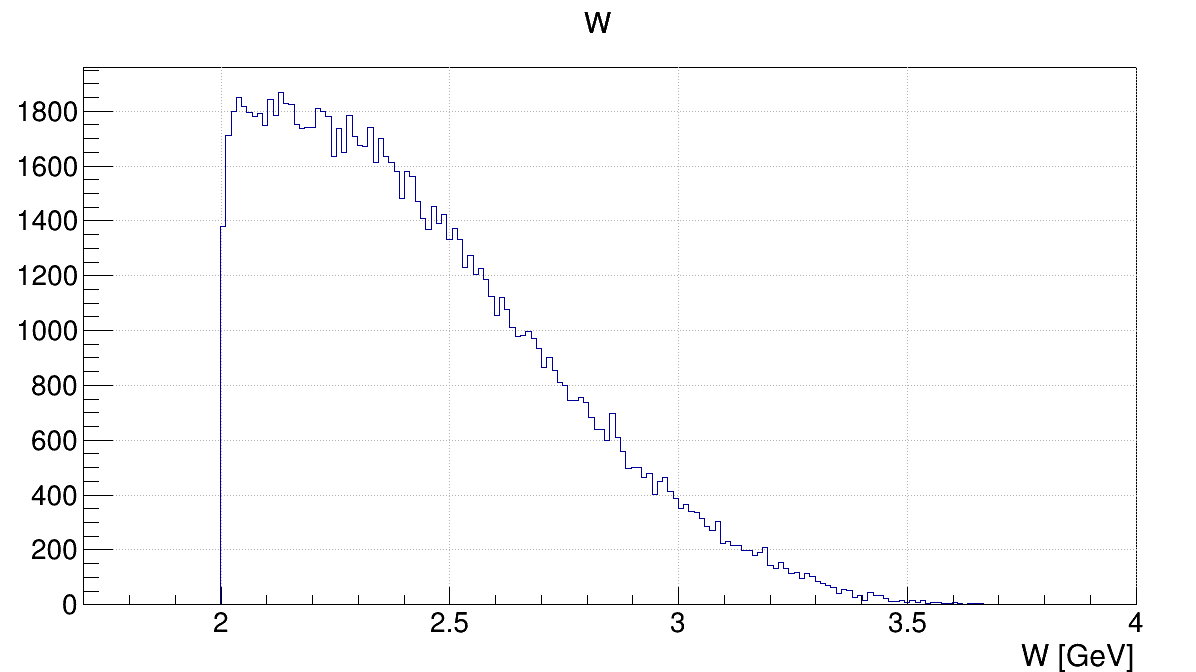

In [8]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hw.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl2.q2xb.inb.pdf has been created


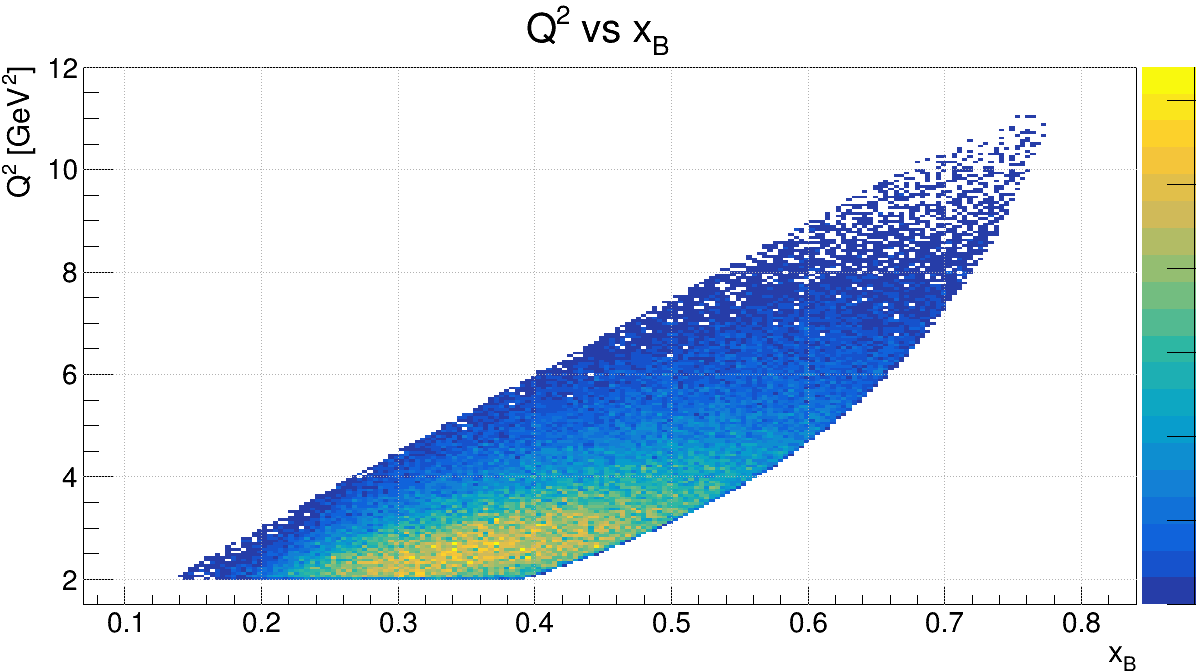

In [9]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
hqx.Draw("colz")
c1.Print(f"pdf/lvl2.q2xb.{dsid}.pdf")

---------------
---------------
---------------

# Particles kinematic coverages

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl2.electron.pthfi.inb.pdf has been created


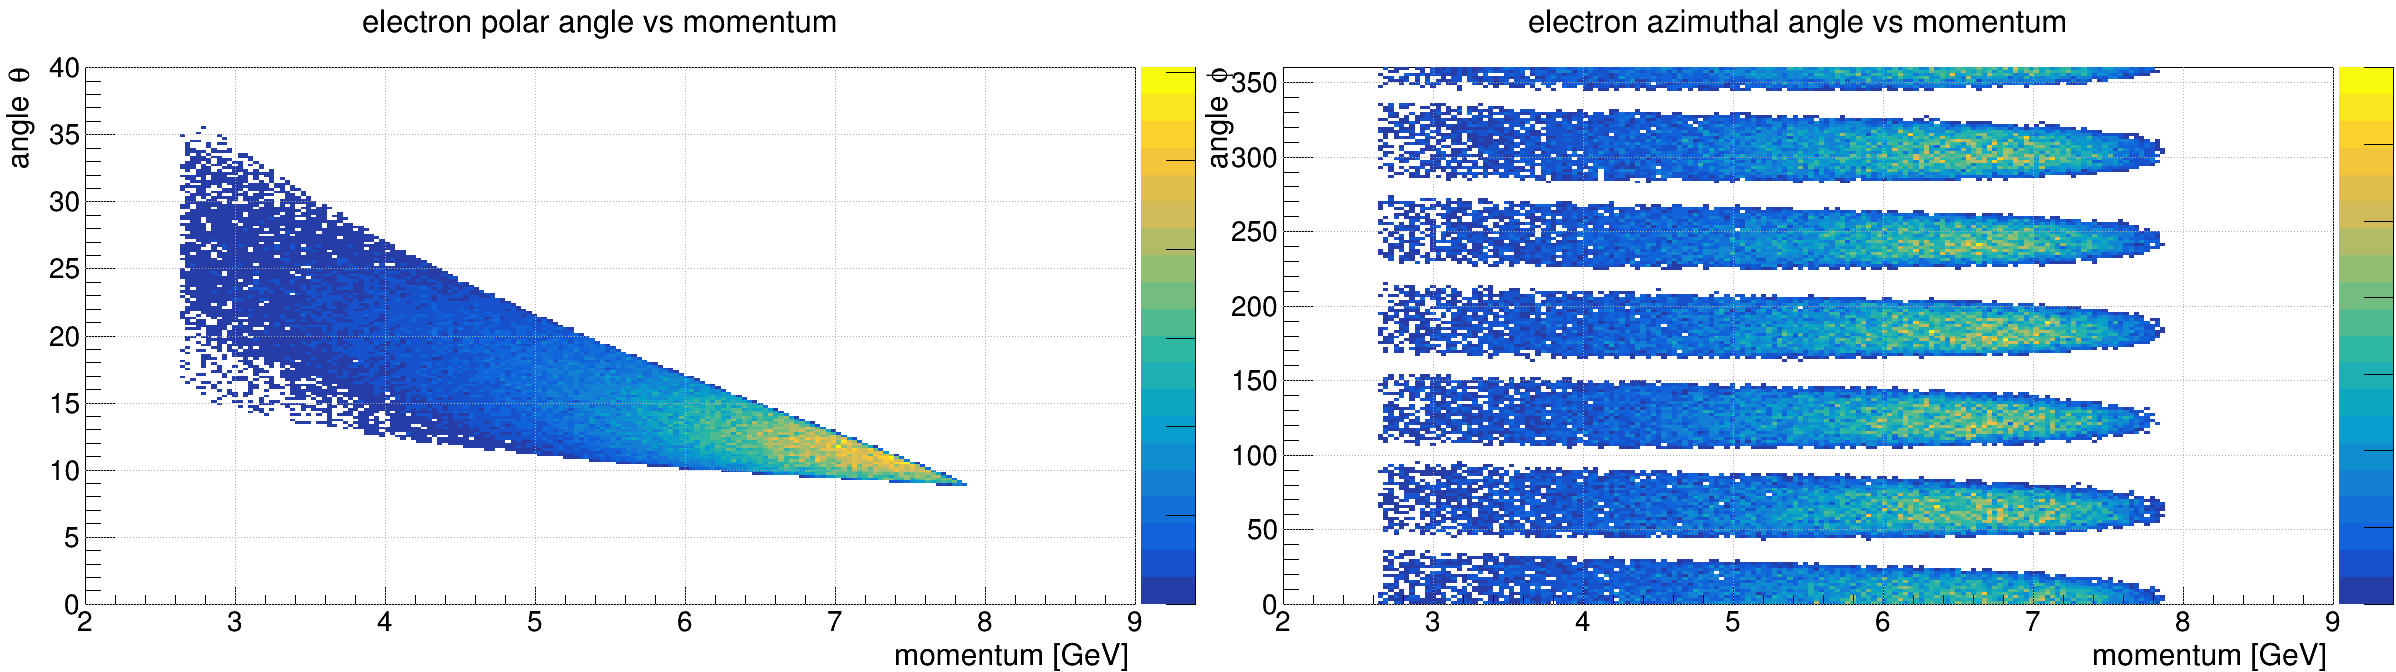

In [10]:
c1 = ROOT.TCanvas("c1","c1",2400,700)
c1.Divide(2,1,0.001,0.001)
c1.Draw()
c1.cd(1)
helepth.Draw("colz")
c1.cd(2)
helepfi.Draw("colz")
c1.Print(f"pdf/lvl2.electron.pthfi.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl2.proton.pthfi.inb.pdf has been created


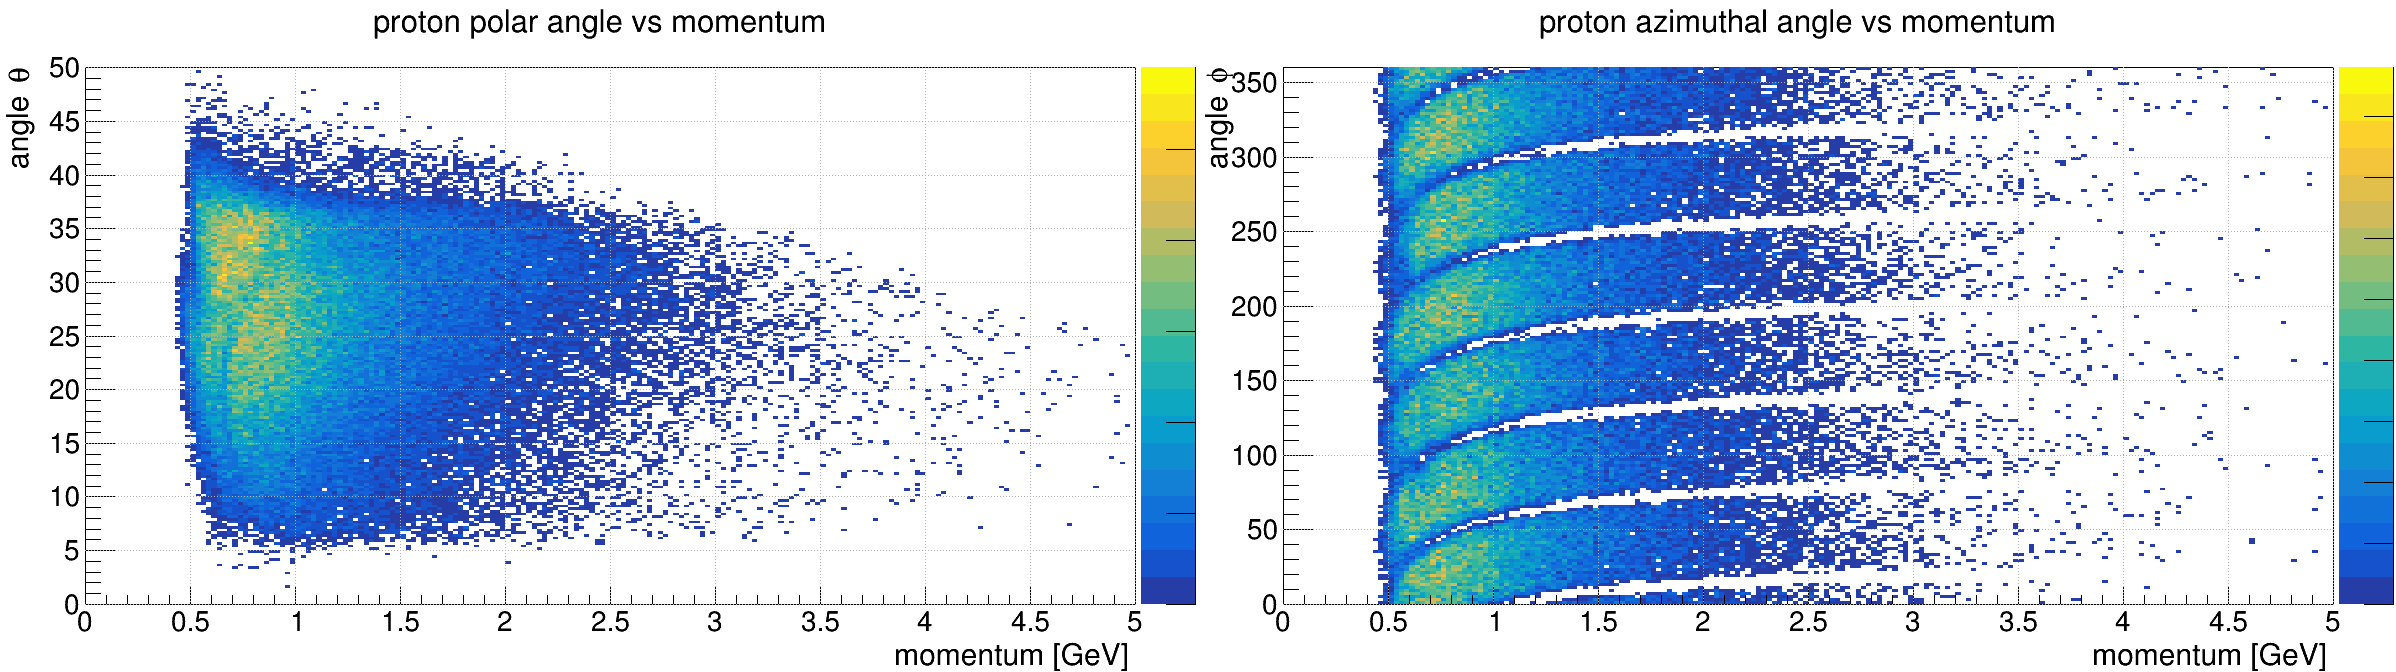

In [11]:
c1 = ROOT.TCanvas("c1","c1",2400,700)
c1.Divide(2,1,0.001,0.001)
c1.Draw()
c1.cd(1)
hpropth.Draw("colz")
c1.cd(2)
hpropfi.Draw("colz")
c1.Print(f"pdf/lvl2.proton.pthfi.{dsid}.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl2.gamma.pthfi.inb.pdf has been created


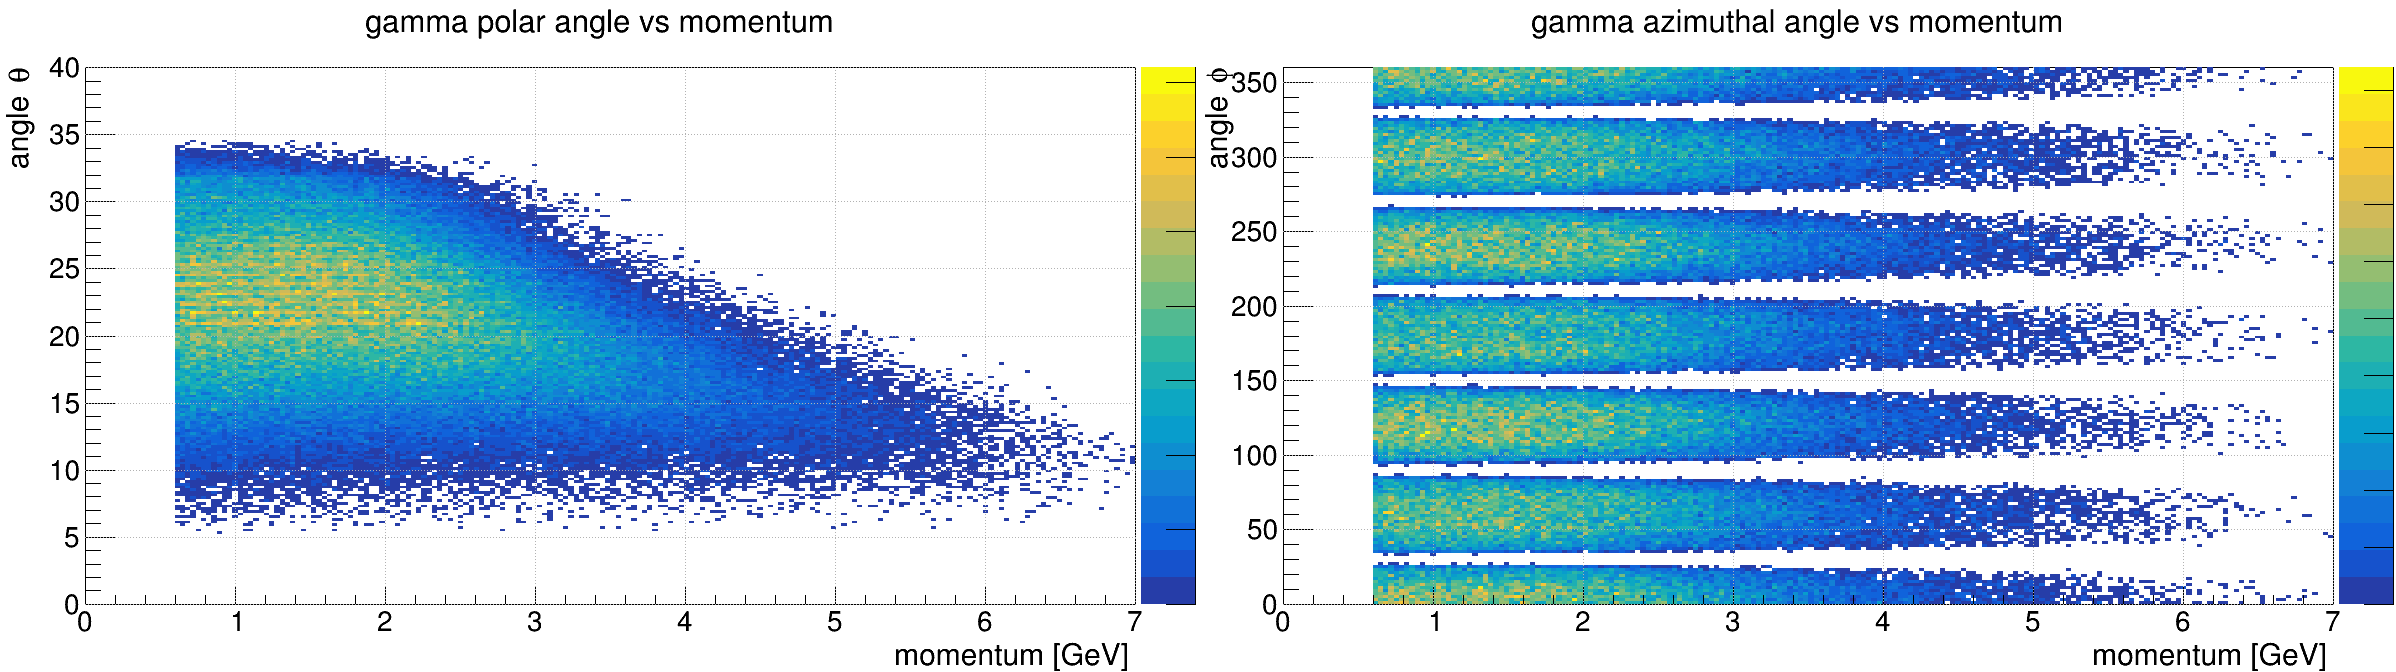

In [12]:
c1 = ROOT.TCanvas("c1","c1",2400,700)
c1.Divide(2,1,0.001,0.001)
c1.Draw()
c1.cd(1)

hgampth.Draw("colz")
c1.cd(2)
hgampfi.Draw("colz")
c1.Print(f"pdf/lvl2.gamma.pthfi.{dsid}.pdf")

---------------
---------------
---------------

# 2D plots of exclusive quantities vs $MM^2$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


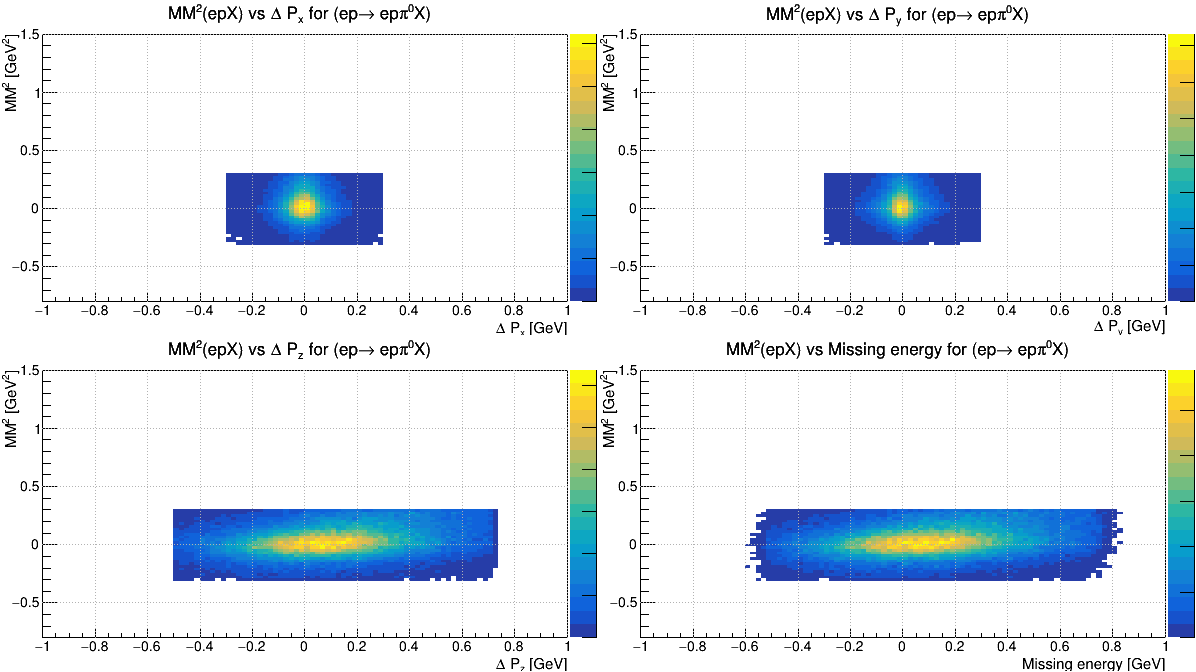

In [13]:
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.Draw()
c1.Divide(2,2,0.001,0.001)
c1.cd(1)
hdpxmm2.Draw('colz')
c1.cd(2)
hdpymm2.Draw('colz')
c1.cd(3)
hdpzmm2.Draw('colz')
c1.cd(4)
hmemm2.Draw('colz')

---------------
---------------
---------------

# Plotting: exclusive quantities

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file pdf/lvl2.exclusive.plots.inb.pdf has been created


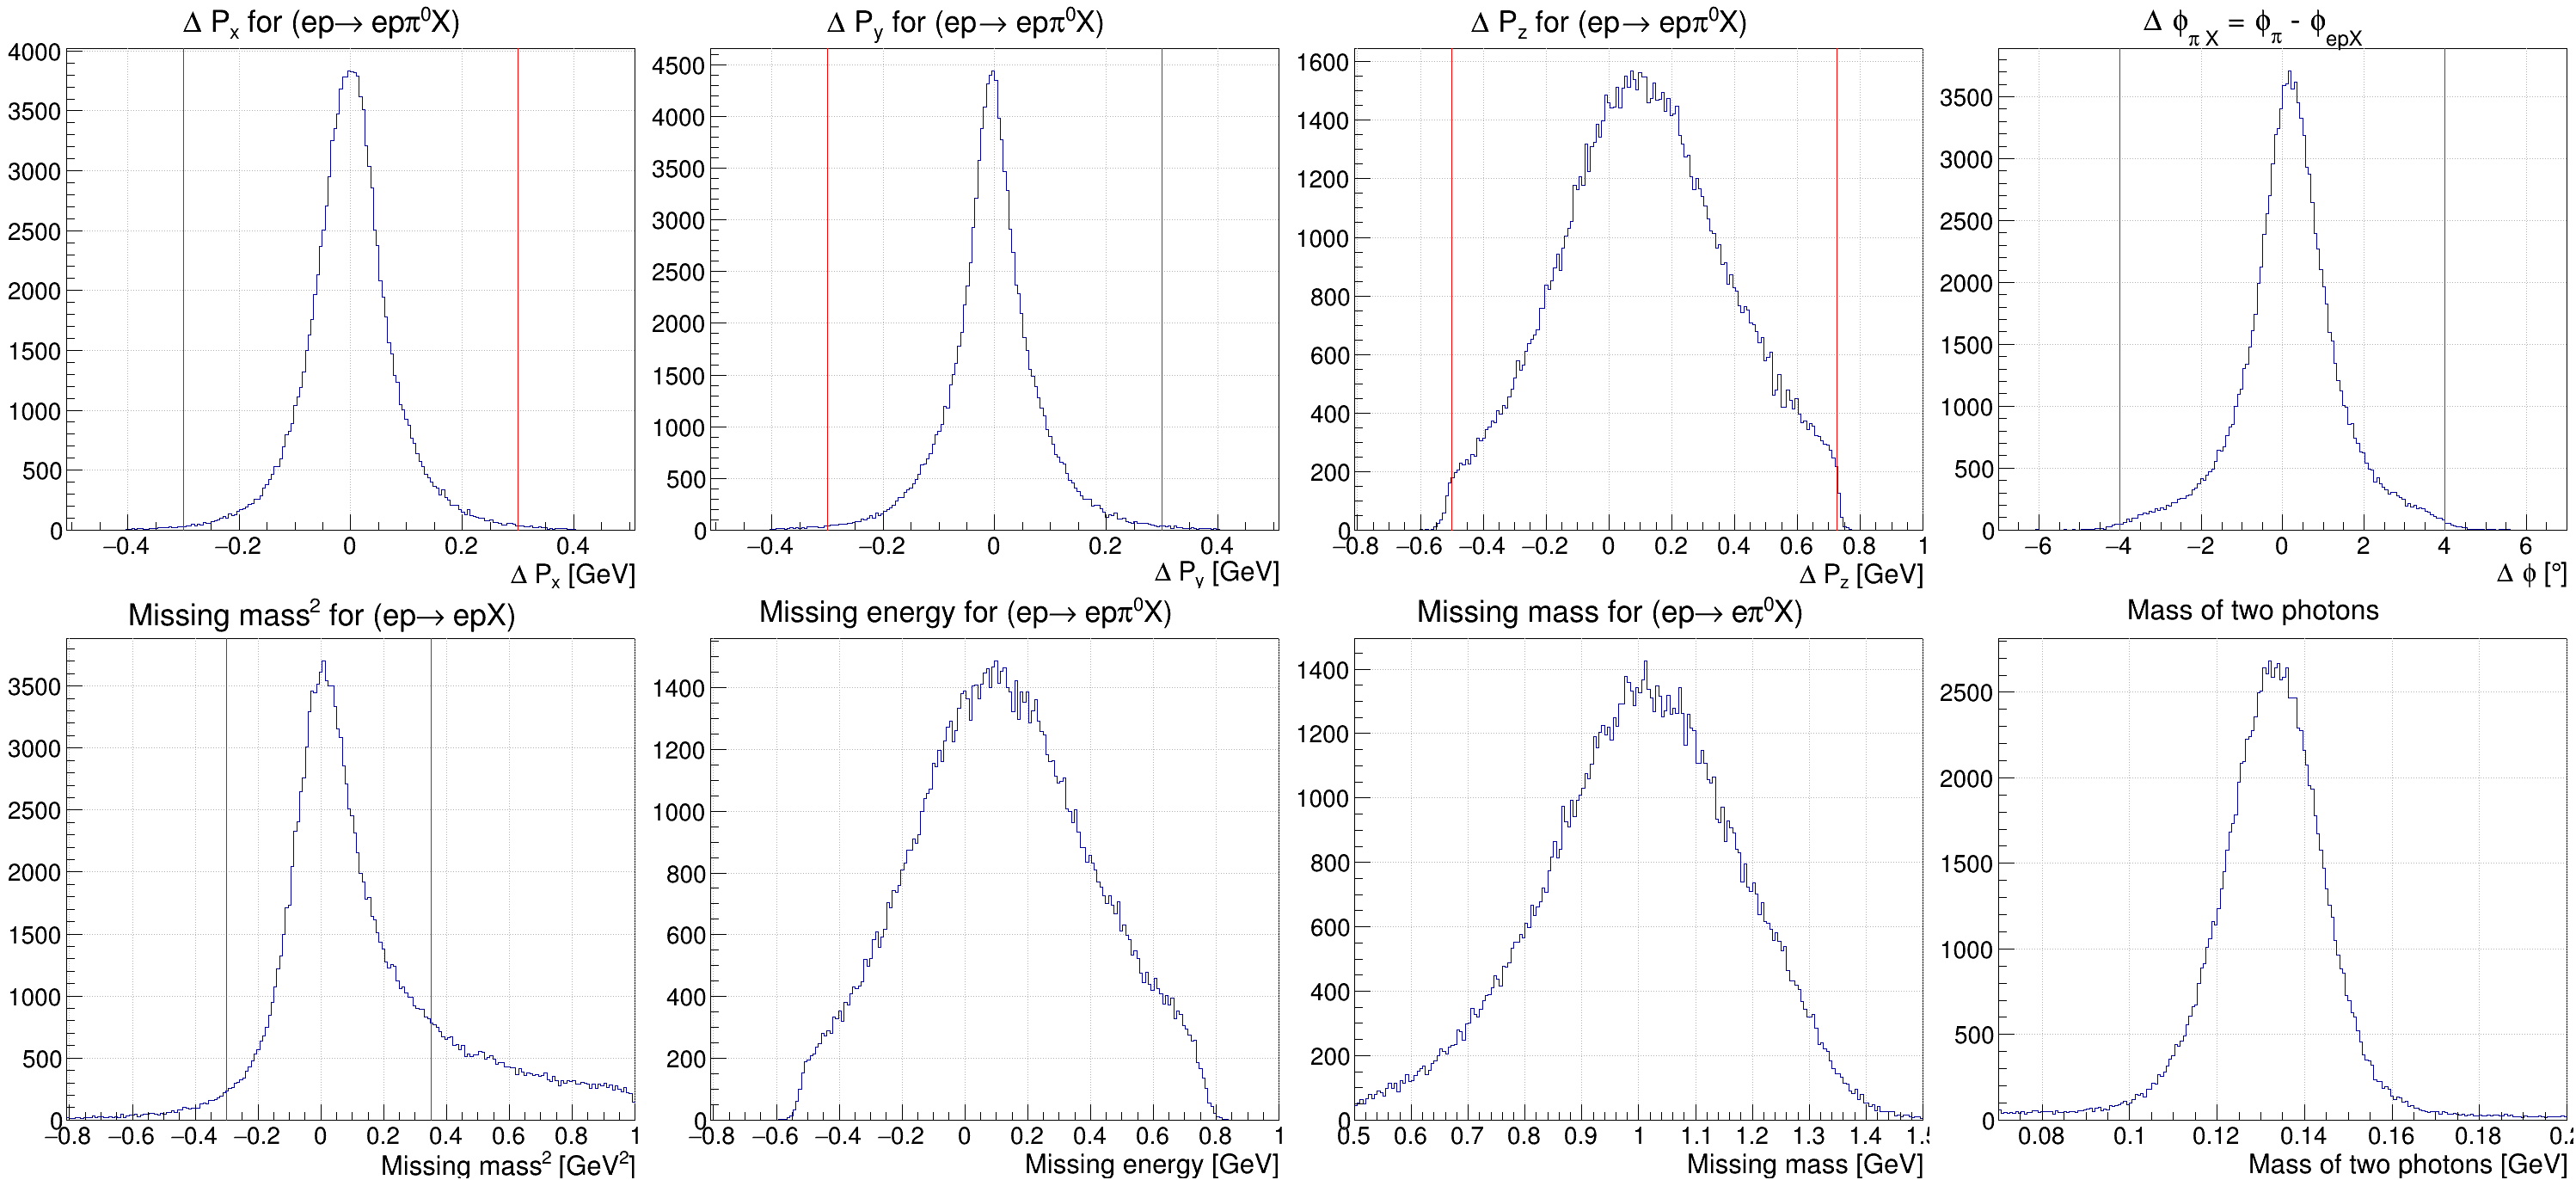

In [14]:
c1 = ROOT.TCanvas("c1","c1",3000,1400)
c1.SetTopMargin(0)
c1.SetRightMargin(0)
c1.Divide(4,2,0.001,0.001)
c1.Draw()


c1.cd(1).SetMargin(0.1,0.01,0.1,0.08)
hdpx.Draw()
ll.DrawLine(-0.3,0,-0.3,hdpx.GetMaximum()*1.05)
ll.DrawLine(0.3,0,0.3,hdpx.GetMaximum()*1.05)

c1.cd(2).SetMargin(0.1,0.01,0.1,0.08)
hdpy.Draw()
ll.DrawLine(-0.3,0,-0.3,hdpy.GetMaximum()*1.05)
ll.DrawLine(0.3,0,0.3,hdpy.GetMaximum()*1.05)

c1.cd(3).SetMargin(0.1,0.01,0.1,0.08)
hdpz.Draw()
ll.DrawLine(-0.5,0,-0.5,hdpz.GetMaximum()*1.05)
ll.DrawLine(0.725,0,0.725,hdpz.GetMaximum()*1.05)

c1.cd(4).SetMargin(0.1,0.01,0.1,0.08)
hdphi.Draw()
ll.DrawLine(-4,0,-4,hdphi.GetMaximum()*1.05)
ll.DrawLine(4,0,4,hdphi.GetMaximum()*1.05)

c1.cd(5).SetMargin(0.1,0.01,0.1,0.08)
hmm2.Draw()
ll.DrawLine(-0.3,0,-0.3,hmm2.GetMaximum()*1.05)
ll.DrawLine(0.35,0,0.35,hmm2.GetMaximum()*1.05)

c1.cd(6).SetMargin(0.1,0.01,0.1,0.08)
hme.Draw()

c1.cd(7).SetMargin(0.1,0.01,0.1,0.08)
hmmp.Draw()

c1.cd(8).SetMargin(0.1,0.01,0.1,0.08)
hmgg.Draw()

c1.Print(f"pdf/lvl2.exclusive.plots.{dsid}.pdf")

---------------
---------------
---------------